In [1]:
# 📌 BMW Car Sales Classification Project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score
)

In [2]:
#Load Dataset
df = pd.read_csv("BMW_Car_Sales_Classification.csv")

# Features (X) and Target (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# # Encode target labels ("High","Medium","Low" → 0,1,2)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Detect categorical & numeric features
num_features = X.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

# Preprocessor: numeric → scale, categorical → one-hot
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), num_features),
    ("cat", OneHotEncoder(handle_unknown="ignore", sparse_output= False), cat_features)
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

🔹 SVM Results
Accuracy: 0.9987
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00      3032
         Low       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Confusion Matrix:
 [[3024    8]
 [   5 6963]]


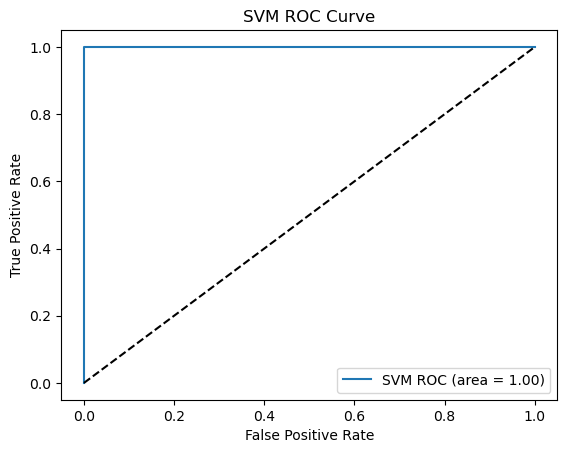

In [3]:
#Support Vector Machine
svc_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("svc", SVC(kernel="linear", probability=True))
])
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)

print("🔹 SVM Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC-AUC (for binary / extendable to one-vs-rest for multi-class)
y_pred_prob = svc_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
plt.plot(fpr, tpr, label=f"SVM ROC (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.legend(loc="lower right")
plt.show()



🔹 Naive Bayes Results
Accuracy: 0.995
Classification Report:
               precision    recall  f1-score   support

        High       0.99      0.99      0.99      3032
         Low       1.00      1.00      1.00      6968

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

Confusion Matrix:
 [[3007   25]
 [  25 6943]]


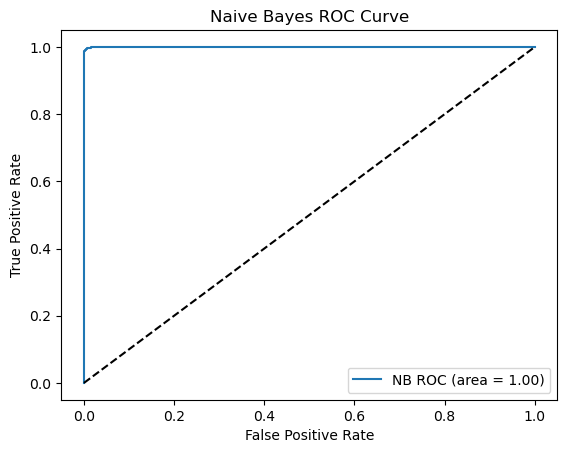

In [4]:
# 2. Naive Bayes
# ============================
nb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("nb", GaussianNB())
])
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)

print("\n🔹 Naive Bayes Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_pred_prob = nb_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
plt.plot(fpr, tpr, label=f"NB ROC (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Naive Bayes ROC Curve")
plt.legend(loc="lower right")
plt.show()



🔹 Logistic Regression Results
Accuracy: 0.9991
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00      3032
         Low       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Confusion Matrix:
 [[3026    6]
 [   3 6965]]


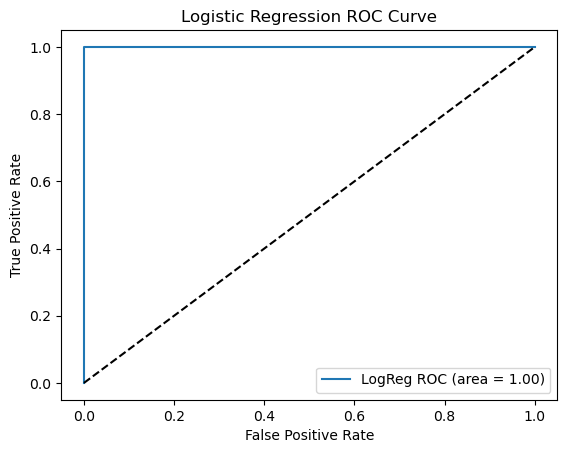

In [5]:
# 3. Logistic Regression
# ============================
from sklearn.pipeline import Pipeline
log_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("logreg", LogisticRegression(max_iter=1000))
])
log_model.fit(X_train, y_train)
y_pred = log_model.predict(X_test)

print("\n🔹 Logistic Regression Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_pred_prob = log_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
plt.plot(fpr, tpr, label=f"LogReg ROC (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend(loc="lower right")
plt.show()


🔹 Decision Tree Results
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00      3032
         Low       1.00      1.00      1.00      6968

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000

Confusion Matrix:
 [[3032    0]
 [   0 6968]]


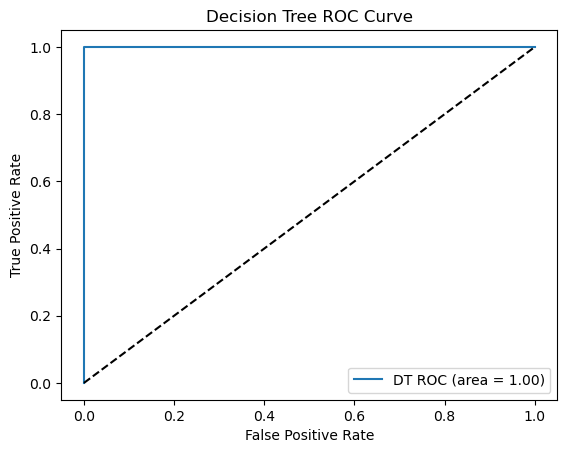

In [6]:
# 4. Decision Tree
# ============================
dt_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("dt", DecisionTreeClassifier(random_state=42))
])
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

print("\n🔹 Decision Tree Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=label_encoder.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

y_pred_prob = dt_model.predict_proba(X_test)
fpr, tpr, _ = roc_curve(y_test, y_pred_prob[:, 1])
roc_auc = roc_auc_score(y_test, y_pred_prob[:, 1])
plt.plot(fpr, tpr, label=f"DT ROC (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Decision Tree ROC Curve")
plt.legend(loc="lower right")
plt.show()

KNN Accuracy: 0.9577

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      3032
           1       0.97      0.97      0.97      6968

    accuracy                           0.96     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.96      0.96      0.96     10000


Confusion Matrix:
 [[2835  197]
 [ 226 6742]]

KNN ROC-AUC Score: 0.99136653537165


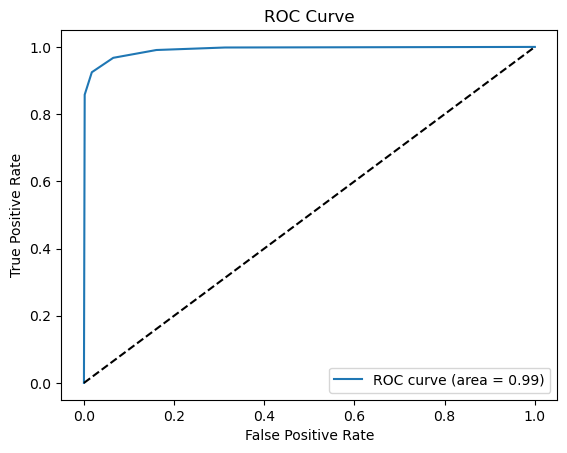

In [7]:
# 5. KNN (Custom Implementation)
# ============================
# Preprocess training & test data first
#KNN Classification Corrected.
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Load and preprocess data
df = pd.read_csv('BMW_Car_Sales_Classification.csv')
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

X = df.iloc[:, :-1].to_numpy()
y = df.iloc[:, -1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def euclidean_distance_vec(x, X):
    return np.sqrt(np.sum((X - x) ** 2, axis=1))

class KNN:
    def __init__(self, k=3):
        self.k = k
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    def predict(self, X):
        # Vectorized prediction for all test instances
        predictions = []
        for x in X:
            distances = euclidean_distance_vec(x, self.X_train)
            k_indices = np.argpartition(distances, self.k)[:self.k]
            k_labels = self.y_train[k_indices]
            predicted = Counter(k_labels).most_common(1)[0][0]
            predictions.append(predicted)
        return np.array(predictions)
    def predict_proba(self, X):
        # Vectorized probability prediction
        probabilities = []
        classes = np.unique(self.y_train)
        for x in X:
            distances = euclidean_distance_vec(x, self.X_train)
            k_indices = np.argpartition(distances, self.k)[:self.k]
            k_labels = self.y_train[k_indices]
            counts = Counter(k_labels)
            probs = [counts.get(c, 0)/self.k for c in classes]
            probabilities.append(probs)
        return np.array(probabilities)

# Train, predict, and metrics
knn = KNN(k=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve for binary classification
if len(np.unique(y)) == 2:
    y_pred_prob = knn.predict_proba(X_test)[:, 1]  # probability for class 1
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    print("\nKNN ROC-AUC Score:", roc_auc)
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()
